In [40]:
import pandas as pd

# Load data from CSV file
data = pd.read_csv('../data/sentinelTestsDetectionsPositivity.csv')

# Display the first few rows of the dataframe
data.head()
data['countryname'].unique()

data['indicator'].unique()

array(['detections', 'positivity', 'tests'], dtype=object)

In [26]:
weekly = czech_flu.groupby(['yearweek', 'indicator'])['value'].sum().unstack()
weekly['positivity'] = weekly['detections'] / weekly['tests']
weekly

czech_flu.groupby(['yearweek', 'indicator'])['value'].first()


yearweek  indicator 
2021-W37  detections     2.0
          positivity    50.0
          tests          4.0
2021-W38  detections     0.0
          positivity     0.0
                        ... 
2024-W51  positivity    16.9
          tests         71.0
2024-W52  detections     1.0
          positivity    10.0
          tests         10.0
Name: value, Length: 505, dtype: float64

In [ ]:
# Filter for global data for the main Influenza type (ignoring subtypes)
global_influenza = data[(data['pathogen'] == 'Influenza') & (data['pathogentype'] == 'Influenza')]

# Group by week and indicator, then sum the values
weekly_global = global_influenza.groupby(['yearweek', 'indicator'])['value'].sum().unstack()

# Compute positivity: detections / tests
weekly_global['positivity'] = weekly_global['detections'] / weekly_global['tests']

# Display the resulting DataFrame
weekly_global




indicator,detections,positivity,tests
yearweek,,,
2020-W25,0.0,0.000000,98.0
2020-W26,0.0,0.000000,94.0
2020-W27,0.0,0.000000,132.0
2020-W28,0.0,0.000000,92.0
2020-W29,0.0,0.000000,92.0
...,...,...,...
2025-W02,3274.0,0.414850,7892.0
2025-W03,4176.0,0.445773,9368.0
2025-W04,5406.0,0.507606,10650.0


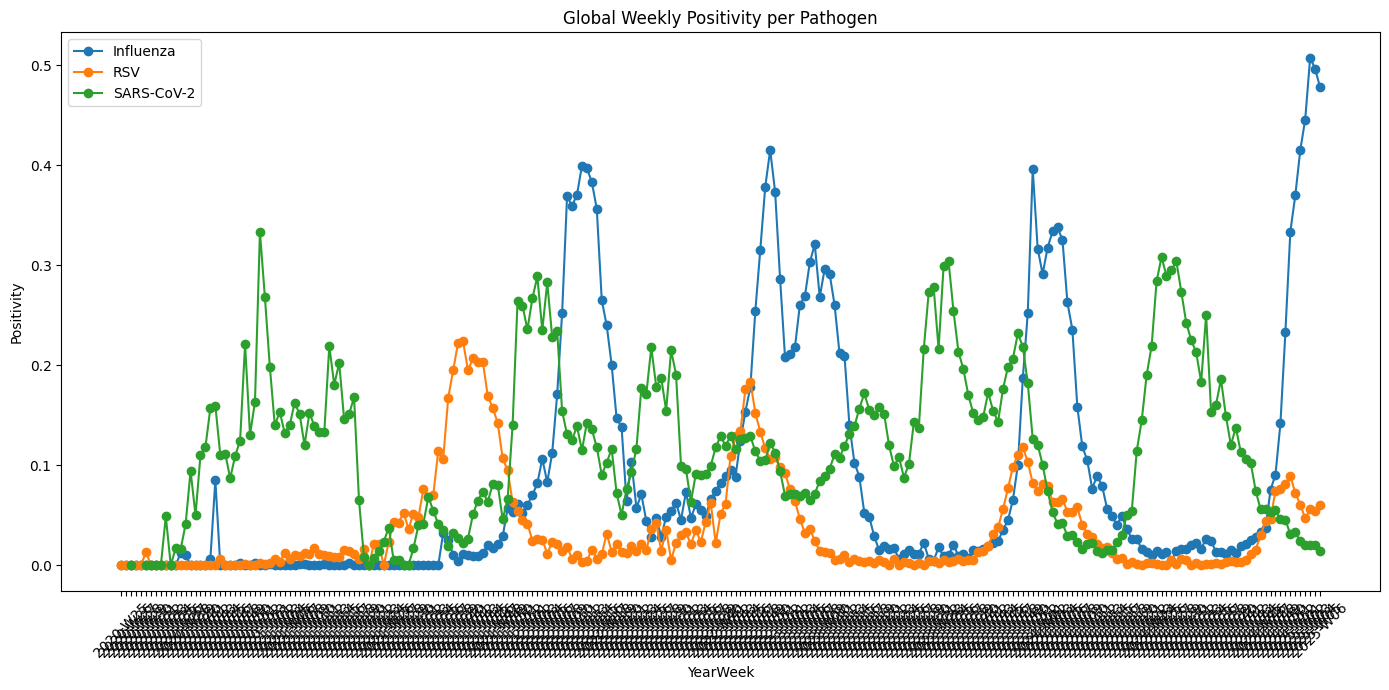

In [34]:
# Select only rows where the main pathogen type is used (i.e. pathogen == pathogentype)
main_pathogen = data[data['pathogen'] == data['pathogentype']]

# Group by week, pathogen, and indicator, then sum the values
weekly_pathogen = main_pathogen.groupby(['yearweek', 'pathogen', 'indicator'])['value'].sum().unstack('indicator')

# Compute positivity for each pathogen and week (detections / tests)
weekly_pathogen['positivity'] = weekly_pathogen['detections'] / weekly_pathogen['tests']

# Reset index for plotting convenience
weekly_pathogen = weekly_pathogen.reset_index()

# Plot positivity over time for each pathogen
fig, ax = plt.subplots(figsize=(14, 7))
for pathogen, grp in weekly_pathogen.groupby('pathogen'):
    ax.plot(grp['yearweek'], grp['positivity'], marker='o', label=pathogen)

ax.set_xlabel('YearWeek')
ax.set_ylabel('Positivity')
ax.set_title('Global Weekly Positivity per Pathogen')
plt.xticks(rotation=45)
ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Select only rows where the main pathogen type is used (i.e. pathogen == pathogentype)
main_pathogen = data[data['pathogen'] == data['pathogentype']]

# Group by week, pathogen, and indicator, then sum the values
weekly_pathogen = main_pathogen.groupby(['yearweek', 'pathogen', 'indicator'])['value'].sum().unstack('indicator')
weekly_pathogen

,survtype,countryname,yearweek,pathogen,pathogentype,pathogensubtype,indicator,age,value
0,primary care sentinel,Austria,2025-W06,Influenza,Influenza,total,detections,total,153.0
1,primary care sentinel,Austria,2025-W06,Influenza,Influenza,total,positivity,total,44.3
2,primary care sentinel,Austria,2025-W06,Influenza,Influenza,total,tests,total,345.0
7,primary care sentinel,Austria,2025-W05,Influenza,Influenza,total,detections,total,163.0
8,primary care sentinel,Austria,2025-W05,Influenza,Influenza,total,positivity,total,42.2
...,...,...,...,...,...,...,...,...,...
45081,primary care sentinel,Sweden,2020-W29,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,tests,total,36.0
45082,primary care sentinel,Sweden,2020-W28,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,tests,total,22.0
45083,primary care sentinel,Sweden,2020-W27,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,tests,total,28.0
45084,primary care sentinel,Sweden,2020-W26,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,tests,total,36.0


In [33]:
data.pathogentype.unique()


array(['Influenza', 'Influenza A', 'Influenza B', 'RSV', 'SARS-CoV-2',
       'RSV-B', 'RSV-A', 'RSV untyped', 'Influenza untyped'], dtype=object)

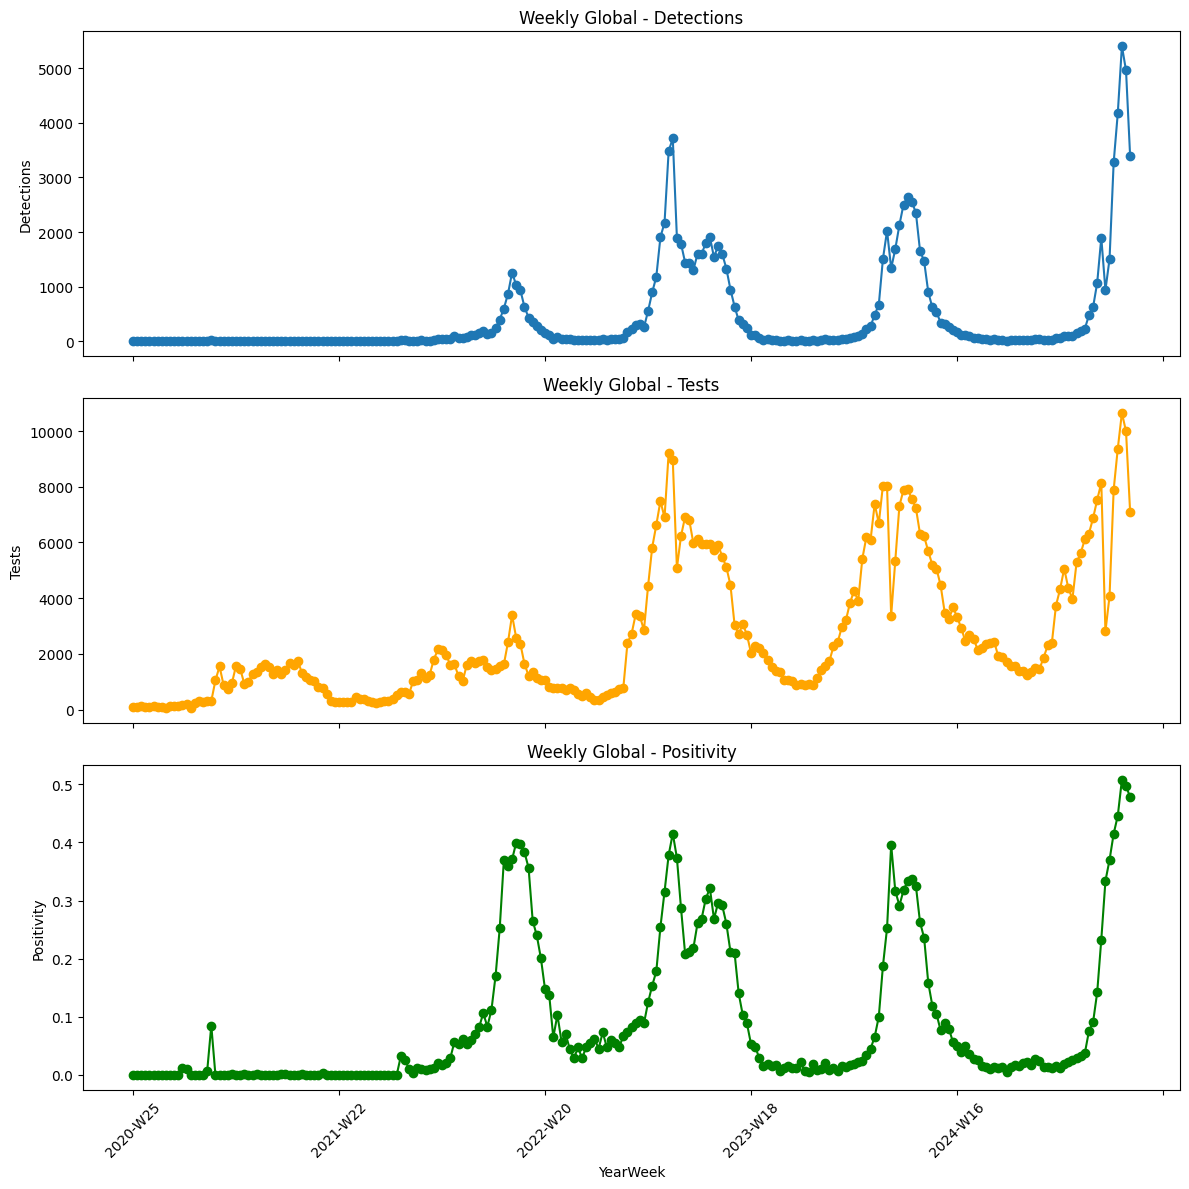

In [30]:
import matplotlib.pyplot as plt

# Create subplots for each indicator
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

weekly_global['detections'].plot(ax=axes[0], marker='o', title='Weekly Global - Detections')
axes[0].set_ylabel('Detections')

weekly_global['tests'].plot(ax=axes[1], marker='o', color='orange', title='Weekly Global - Tests')
axes[1].set_ylabel('Tests')

weekly_global['positivity'].plot(ax=axes[2], marker='o', color='green', title='Weekly Global - Positivity')
axes[2].set_ylabel('Positivity')

plt.xlabel('YearWeek')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()